In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
df = pd.read_csv('../../data/full_cleaned.csv')

In [4]:
df.head()

,title,news_stopwords,news_no_stopwords,category
0,निखिल उप्रेतीको भैरव फिल्मले अमेरिकामा रहेका न...,अमेरिकाका नेपालीको प्रतिक्रिया लिने इच्छा व्यक...,अमेरिकाका नेपालीको प्रतिक्रिया लिने इच्छा व्यक...,मनोरञ्जन
1,सुशील कोइरालाको निधनपछि चौरासी बाले खोले यस्ता...,झण्डै बर्षअघि सुशील कोइरालाले प्रधानमन्त्रीको ...,झण्डै बर्षअघि सुशील कोइरालाले प्रधानमन्त्रीको ...,मनोरञ्जन
2,लिटल प्रिन्स एण्ड प्रिन्सेसको ग्रान्ड फिनाले,ग्ल्यामरस नेपालले सुरुङ्गामा लिटल प्रिन्स एन्ड...,ग्ल्यामरस नेपालले सुरुङ्गामा लिटल प्रिन्स एन्ड...,मनोरञ्जन
3,अमेरिकामा सबैभन्दा धेरै कमाउने सिईओ बने पिचाई ...,गूगलका सिईओ सुन्दर पिचाई अमेरिकामा सबैभन्दा धे...,गूगलका सिईओ सुन्दर पिचाई अमेरिकामा सबैभन्दा कम...,मनोरञ्जन
4,ज्योती मगरको धमाका दोहोरीमा र्याप,दोहोरीमा र्याप बोलको गीतको भिडियो सार्वजनिक भए...,दोहोरीमा र्याप बोलको गीतको भिडियो सार्वजनिक चर...,मनोरञ्जन


In [5]:
df.head(5)

,title,news_stopwords,news_no_stopwords,category
0,निखिल उप्रेतीको भैरव फिल्मले अमेरिकामा रहेका न...,अमेरिकाका नेपालीको प्रतिक्रिया लिने इच्छा व्यक...,अमेरिकाका नेपालीको प्रतिक्रिया लिने इच्छा व्यक...,मनोरञ्जन
1,सुशील कोइरालाको निधनपछि चौरासी बाले खोले यस्ता...,झण्डै बर्षअघि सुशील कोइरालाले प्रधानमन्त्रीको ...,झण्डै बर्षअघि सुशील कोइरालाले प्रधानमन्त्रीको ...,मनोरञ्जन
2,लिटल प्रिन्स एण्ड प्रिन्सेसको ग्रान्ड फिनाले,ग्ल्यामरस नेपालले सुरुङ्गामा लिटल प्रिन्स एन्ड...,ग्ल्यामरस नेपालले सुरुङ्गामा लिटल प्रिन्स एन्ड...,मनोरञ्जन
3,अमेरिकामा सबैभन्दा धेरै कमाउने सिईओ बने पिचाई ...,गूगलका सिईओ सुन्दर पिचाई अमेरिकामा सबैभन्दा धे...,गूगलका सिईओ सुन्दर पिचाई अमेरिकामा सबैभन्दा कम...,मनोरञ्जन
4,ज्योती मगरको धमाका दोहोरीमा र्याप,दोहोरीमा र्याप बोलको गीतको भिडियो सार्वजनिक भए...,दोहोरीमा र्याप बोलको गीतको भिडियो सार्वजनिक चर...,मनोरञ्जन


In [6]:
df.shape

(369800, 4)

For classification, we only need the news(news_no_stopwords) and catgeory.<br>
So lets remove the other unnecessary columns

In [7]:
df.drop(columns=["title", "news_stopwords"], inplace=True)

In [8]:
df.shape

(369800, 2)

In [9]:
df.describe()

,news_no_stopwords,category
count,369800,369800
unique,361955,10
top,थप जनामा कोरोना भाइरस संक्रमण पुष्टि घन्टामा द...,राजनीति
freq,36,59975


So, we have 361955 unique news scattered along 10 different catgeories.<br>
There seems to be duplicate news. So lets remove them.

In [10]:
df.drop_duplicates(["news_no_stopwords"], inplace=True)

In [11]:
df.describe()

,news_no_stopwords,category
count,361955,361955
unique,361955,10
top,अमेरिकाका नेपालीको प्रतिक्रिया लिने इच्छा व्यक...,राजनीति
freq,1,57256


Now lets check if there are any null values.<br>
If there are any, we will remove them too

In [12]:
df.isnull().sum()

news_no_stopwords    0
category             0
dtype: int64

In [13]:
df['category'].value_counts()

category
राजनीति              57256
देश/प्रदेश           50188
समाज                 49303
खेलकुद               42201
अर्थ / वाणिज्य       40238
विश्व                37305
मनोरञ्जन             34074
विज्ञान र प्रविधि    23076
स्वास्थ्य            21600
शिक्षा                6714
Name: count, dtype: int64

The number of samples for catgeory "शिक्षा" is extremely low, so lets just remove it from the dataset altogether

Also, I found that data relating to "देश/प्रदेश" is also pretty bad. Most of them are about just local news which repeats the same as news from other categories.<br>
So, I am going to remove it too

In [14]:
df = df[df["category"] != "शिक्षा"]
df = df[df["category"] != "देश/प्रदेश"]

Lets convert our categories to labels

In [15]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['category'])

In [16]:
df['category'].value_counts()

category
राजनीति              57256
समाज                 49303
खेलकुद               42201
अर्थ / वाणिज्य       40238
विश्व                37305
मनोरञ्जन             34074
विज्ञान र प्रविधि    23076
स्वास्थ्य            21600
Name: count, dtype: int64

Now lets compute the length of each news article<br>

In [17]:
df["length"] = df["news_no_stopwords"].apply(lambda x: len(x.split()))

Lets remove any news of length <30<br>

In [18]:
df = df[df["length"] >= 30]

We will train our model to predict its catgeory using news with maximum length of 256.<br>
So, any news of length >256, we will slice it to be of required length.<br>
Similarly, news of length <256 will be extended to to be of required length by padding 0s

In [19]:
parameters = {
    'MAX_NEWS_LENGTH': 256,
    'TOTAL_CATEGORIES': df['label'].nunique(),
    'VOCAB_SIZE': 52_000,
    'EMBEDDING_DIMENSION': 50,
    'LATENT_DIMENSION': 8,
    'DROPOUT': 0.2,
    'BATCH_SIZE': 512,
    'EPOCHS': 16,
    'EARLY_STOPPING': 3
}

In [20]:
df["news_no_stopwords"] = df["news_no_stopwords"].apply(lambda x: " ".join(x.split()[:parameters["MAX_NEWS_LENGTH"]]))

Lets check if data is distributed evenly between the catgeories  

<Axes: xlabel='label', ylabel='count'>

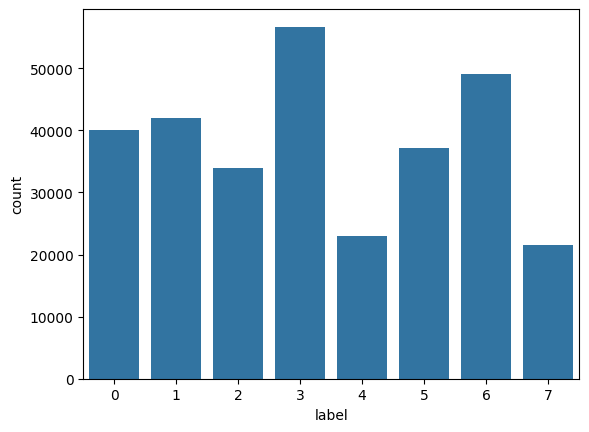

In [21]:
sns.countplot(data=df, x='label')

Our data is highly imbalanced, so lets perform random undersampling so that maximum number of instances for each catgeory is atmost 25K

In [22]:
def random_undersampling(data, random_state):
    if len(data) > 25000:
        return data.sample(25000, random_state=random_state)
    return data

In [23]:
df_balanced = pd.DataFrame(columns=['news_no_stopwords', 'label'])
for i in range(parameters["TOTAL_CATEGORIES"]):
    res = random_undersampling(df[df["label"] == i], i * np.random.randint(100))
    if df_balanced.empty == True:
        df_balanced = res
    else:
        df_balanced = pd.concat([df_balanced, res], ignore_index=True)

In [24]:
df_balanced["label"].value_counts()

label
0    25000
1    25000
2    25000
3    25000
5    25000
6    25000
4    23027
7    21490
Name: count, dtype: int64

Now, our dataset has been balanced.<br>
Lets shuffle the dataset so that their order of news from same categories is not simulatenous

In [25]:
df_balanced.head(4)

,news_no_stopwords,category,label,length
0,बैंक अफ काठमाण्डूले फर्निचर वान स्टोरसँग सम्झौ...,अर्थ / वाणिज्य,0,74
1,गत आर्थिक वर्षको अन्त्यसम्म मुलुकभरका उद्योगले...,अर्थ / वाणिज्य,0,543
2,वर्षझैँ यसपटक बागमती प्रदेशको बजेट कार्यान्वयन...,अर्थ / वाणिज्य,0,1066
3,काठमाण्डौमा दिनसम्म टाटा मोटर्स कार्निभलमा हजा...,अर्थ / वाणिज्य,0,106


In [26]:
for i in range(20):
    df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [27]:
df_balanced.head(4)

,news_no_stopwords,category,label,length
0,धरान उपमहानगरपालिकाले इटहरीमा जारी स्वर्गीय गि...,खेलकुद,1,123
1,निर्वाचन आयोगले जारी आचारसंहिता उलंघन गृहमन्त्...,राजनीति,3,121
2,प्रमुख प्रतिपक्षी दल नेकपा एमालेका उपाध्यक्ष भ...,राजनीति,3,167
3,परराष्ट्र मन्त्रालयका सहसचिव हरिशचन्द्र घिमिरे...,समाज,6,95


Now lets split our dataset into train(70%), validation set(12.5%) and test set(12.5%)

In [28]:
X_train, X_val_test, y_train, y_val_test = train_test_split(df_balanced['news_no_stopwords'], df_balanced['label'], test_size=0.20, random_state=21, stratify=df_balanced["label"], shuffle=True)

In [29]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=28, stratify=y_val_test, shuffle=True)

In [30]:
X_train.shape, X_val.shape, X_test.shape 

((155613,), (19452,), (19452,))

Now we will create our tokenizer

Here, we will be creating a word tokenizer

In [31]:
tokenizer = Tokenizer(num_words=parameters['VOCAB_SIZE'])
tokenizer.fit_on_texts(list(X_train))

Now we convert our words to integers

In [32]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_val_seq = tokenizer.texts_to_sequences(X_val)

Finally we will pad our sequences so that all the inputs are of same length, 256

In [33]:
X_train_pad_seq = pad_sequences(X_train_seq,  maxlen=parameters["MAX_NEWS_LENGTH"], padding='post')
X_test_pad_seq = pad_sequences(X_test_seq,  maxlen=parameters["MAX_NEWS_LENGTH"], padding='post')
X_val_pad_seq = pad_sequences(X_val_seq,  maxlen=parameters["MAX_NEWS_LENGTH"], padding='post')

In [34]:
X_train_pad_seq.shape, X_val_pad_seq.shape, X_test_pad_seq.shape

((155613, 256), (19452, 256), (19452, 256))

If target variables are simply a list of targets. Eg: [1, 2, 0] then, we can use the sparse catgeorical crossentropy loss

Similarly, we can also one-hot-encode each target value in which case we would use categorical crossentropy loss

In [35]:
y_train = tf.keras.utils.to_categorical(y_train, parameters["TOTAL_CATEGORIES"])
y_val = tf.keras.utils.to_categorical(y_val, parameters["TOTAL_CATEGORIES"])
y_test = tf.keras.utils.to_categorical(y_test, parameters["TOTAL_CATEGORIES"])

In [36]:
y_train.shape, y_val.shape, y_test.shape

((155613, 8), (19452, 8), (19452, 8))

Now lets create our LSTM model for news classification

In [37]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(parameters['MAX_NEWS_LENGTH'],)))
model.add(tf.keras.layers.Embedding(parameters["VOCAB_SIZE"], parameters["EMBEDDING_DIMENSION"], input_length=parameters["MAX_NEWS_LENGTH"], name="Embedding_Layer"))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(parameters["LATENT_DIMENSION"], return_sequences=False, dropout=parameters['DROPOUT'], recurrent_dropout=parameters['DROPOUT'], name="BiLSTM_Layer")))
model.add(tf.keras.layers.Dense(parameters["TOTAL_CATEGORIES"], activation='softmax', name="Softmax_Layer"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Embedding_Layer (Embedding)     │ (None, 256, 50)        │     2,600,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 16)             │         3,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax_Layer (Dense)           │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,603,912 (9.93 MB)

 Trainable params: 2,603,912 (9.93 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
tf.keras.utils.plot_model(model, to_file='../../outputs/model_architecture.png', show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [39]:
model.compile(loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy', tf.keras.metrics.F1Score(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

We will train using early stopping

In [40]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=parameters["EARLY_STOPPING"])
cp = tf.keras.callbacks.ModelCheckpoint("../../outputs/lstm/LSTM_nepali_news_classifier_model.keras", monitor="val_loss", mode="min", save_best_only=True)

In [41]:
history = model.fit(X_train_pad_seq, y_train,
                    batch_size=parameters["BATCH_SIZE"],
                    epochs=parameters["EPOCHS"],
                    validation_data=(X_val_pad_seq, y_val),
                    callbacks=[es, cp])

Epoch 1/16
304/304 ━━━━━━━━━━━━━━━━━━━━ 59s 187ms/step - accuracy: 0.4652 - f1_score: 0.4155 - loss: 1.7204 - precision: 0.5537 - recall: 0.0249 - val_accuracy: 0.8065 - val_f1_score: 0.8008 - val_loss: 0.8778 - val_precision: 0.9273 - val_recall: 0.4878
Epoch 2/16
304/304 ━━━━━━━━━━━━━━━━━━━━ 61s 202ms/step - accuracy: 0.8099 - f1_score: 0.8062 - loss: 0.7745 - precision: 0.9131 - recall: 0.6086 - val_accuracy: 0.8544 - val_f1_score: 0.8527 - val_loss: 0.5500 - val_precision: 0.8925 - val_recall: 0.8100
Epoch 3/16
304/304 ━━━━━━━━━━━━━━━━━━━━ 72s 236ms/step - accuracy: 0.8661 - f1_score: 0.8646 - loss: 0.5012 - precision: 0.9033 - recall: 0.8226 - val_accuracy: 0.8602 - val_f1_score: 0.8582 - val_loss: 0.4880 - val_precision: 0.8865 - val_recall: 0.8344
Epoch 4/16
304/304 ━━━━━━━━━━━━━━━━━━━━ 82s 270ms/step - accuracy: 0.8881 - f1_score: 0.8867 - loss: 0.3978 - precision: 0.9125 - recall: 0.8633 - val_accuracy: 0.8618 - val_f1_score: 0.8601 - val_loss: 0.4647 - val_precision: 0.8861 -

Now lets evalaute our model on the test set

In [42]:
model.evaluate(X_test_pad_seq, y_test)

608/608 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8595 - f1_score: 0.8569 - loss: 0.4871 - precision: 0.8738 - recall: 0.8474


[0.475491464138031,
 0.8622763752937317,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([0.7909257 , 0.9713831 , 0.94648224, 0.8750742 , 0.8740327 ,
        0.89090544, 0.69509417, 0.8447685 ], dtype=float32)>,
 0.8768929243087769,
 0.8513777256011963]

In [43]:
import io, json, pickle

In [44]:
with open('../../outputs/lstm/train_history.pkl', 'wb') as hist:
    pickle.dump(history.history, hist)

In [45]:
# Convert and write JSON object to file
with open("../../outputs/lstm/parameters.json", "w") as const: 
    json.dump(parameters, const)

In [ ]:
with io.open('../../outputs/lstm//tokenizer.json', 'w', encoding='utf-8') as tok:
    tok.write(json.dumps(tokenizer.to_json(), ensure_ascii=False))

In [47]:
with open('../../outputs/lstm/label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)